## Imports

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif
import seaborn as sns


from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

## Dataset

In [2]:
df = pd.read_csv('Chronic_kidney_disease.csv')
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,0,0,1,1,121,...,44,7800,5.2,0,0,1,1,1,1,ckd
1,7,50,1.02,4,0,0,0,1,1,?,...,38,6000,0.0,1,1,1,1,1,1,ckd
2,62,80,1.01,2,3,0,0,1,1,423,...,31,7500,0.0,1,0,1,0,1,0,ckd
3,48,70,1.005,4,0,0,1,0,1,117,...,32,6700,3.9,0,1,1,0,0,0,ckd
4,51,80,1.01,2,0,0,0,1,1,106,...,35,7300,4.6,1,1,1,1,1,1,ckd


In [3]:
df.shape

(400, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    object 
 1   bp      400 non-null    object 
 2   sg      400 non-null    object 
 3   al      400 non-null    object 
 4   su      400 non-null    object 
 5   rbc     400 non-null    int64  
 6   pc      400 non-null    int64  
 7   pcc     400 non-null    int64  
 8   ba      400 non-null    int64  
 9   bgr     400 non-null    object 
 10  bu      400 non-null    object 
 11  sc      400 non-null    object 
 12  sod     400 non-null    object 
 13  pot     400 non-null    object 
 14  hemo    400 non-null    object 
 15  pcv     400 non-null    int64  
 16  wbcc    400 non-null    int64  
 17  rbcc    400 non-null    float64
 18  htn     400 non-null    int64  
 19  dm      400 non-null    int64  
 20  cad     400 non-null    int64  
 21  appet   400 non-null    int64  
 22  pe

In [5]:
df.describe()

,rbc,pc,pcc,ba,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.117500,0.190000,0.885000,0.935000,31.982500,6178.500000,3.16575,0.627500,0.645000,0.905000,0.792500,0.807500,0.847500
std,0.322418,0.392792,0.319421,0.246835,16.962799,4490.489839,2.36621,0.484076,0.479113,0.293582,0.406024,0.394757,0.359955
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,26.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,0.000000,0.000000,1.000000,1.000000,37.000000,6900.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,0.000000,0.000000,1.000000,1.000000,44.000000,9400.000000,5.10000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,54.000000,26400.000000,8.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# prof = df.profile_report(title='Pandas Profiling Report')
# prof.to_file(output_file="ckdreport.html")

## Analying Data

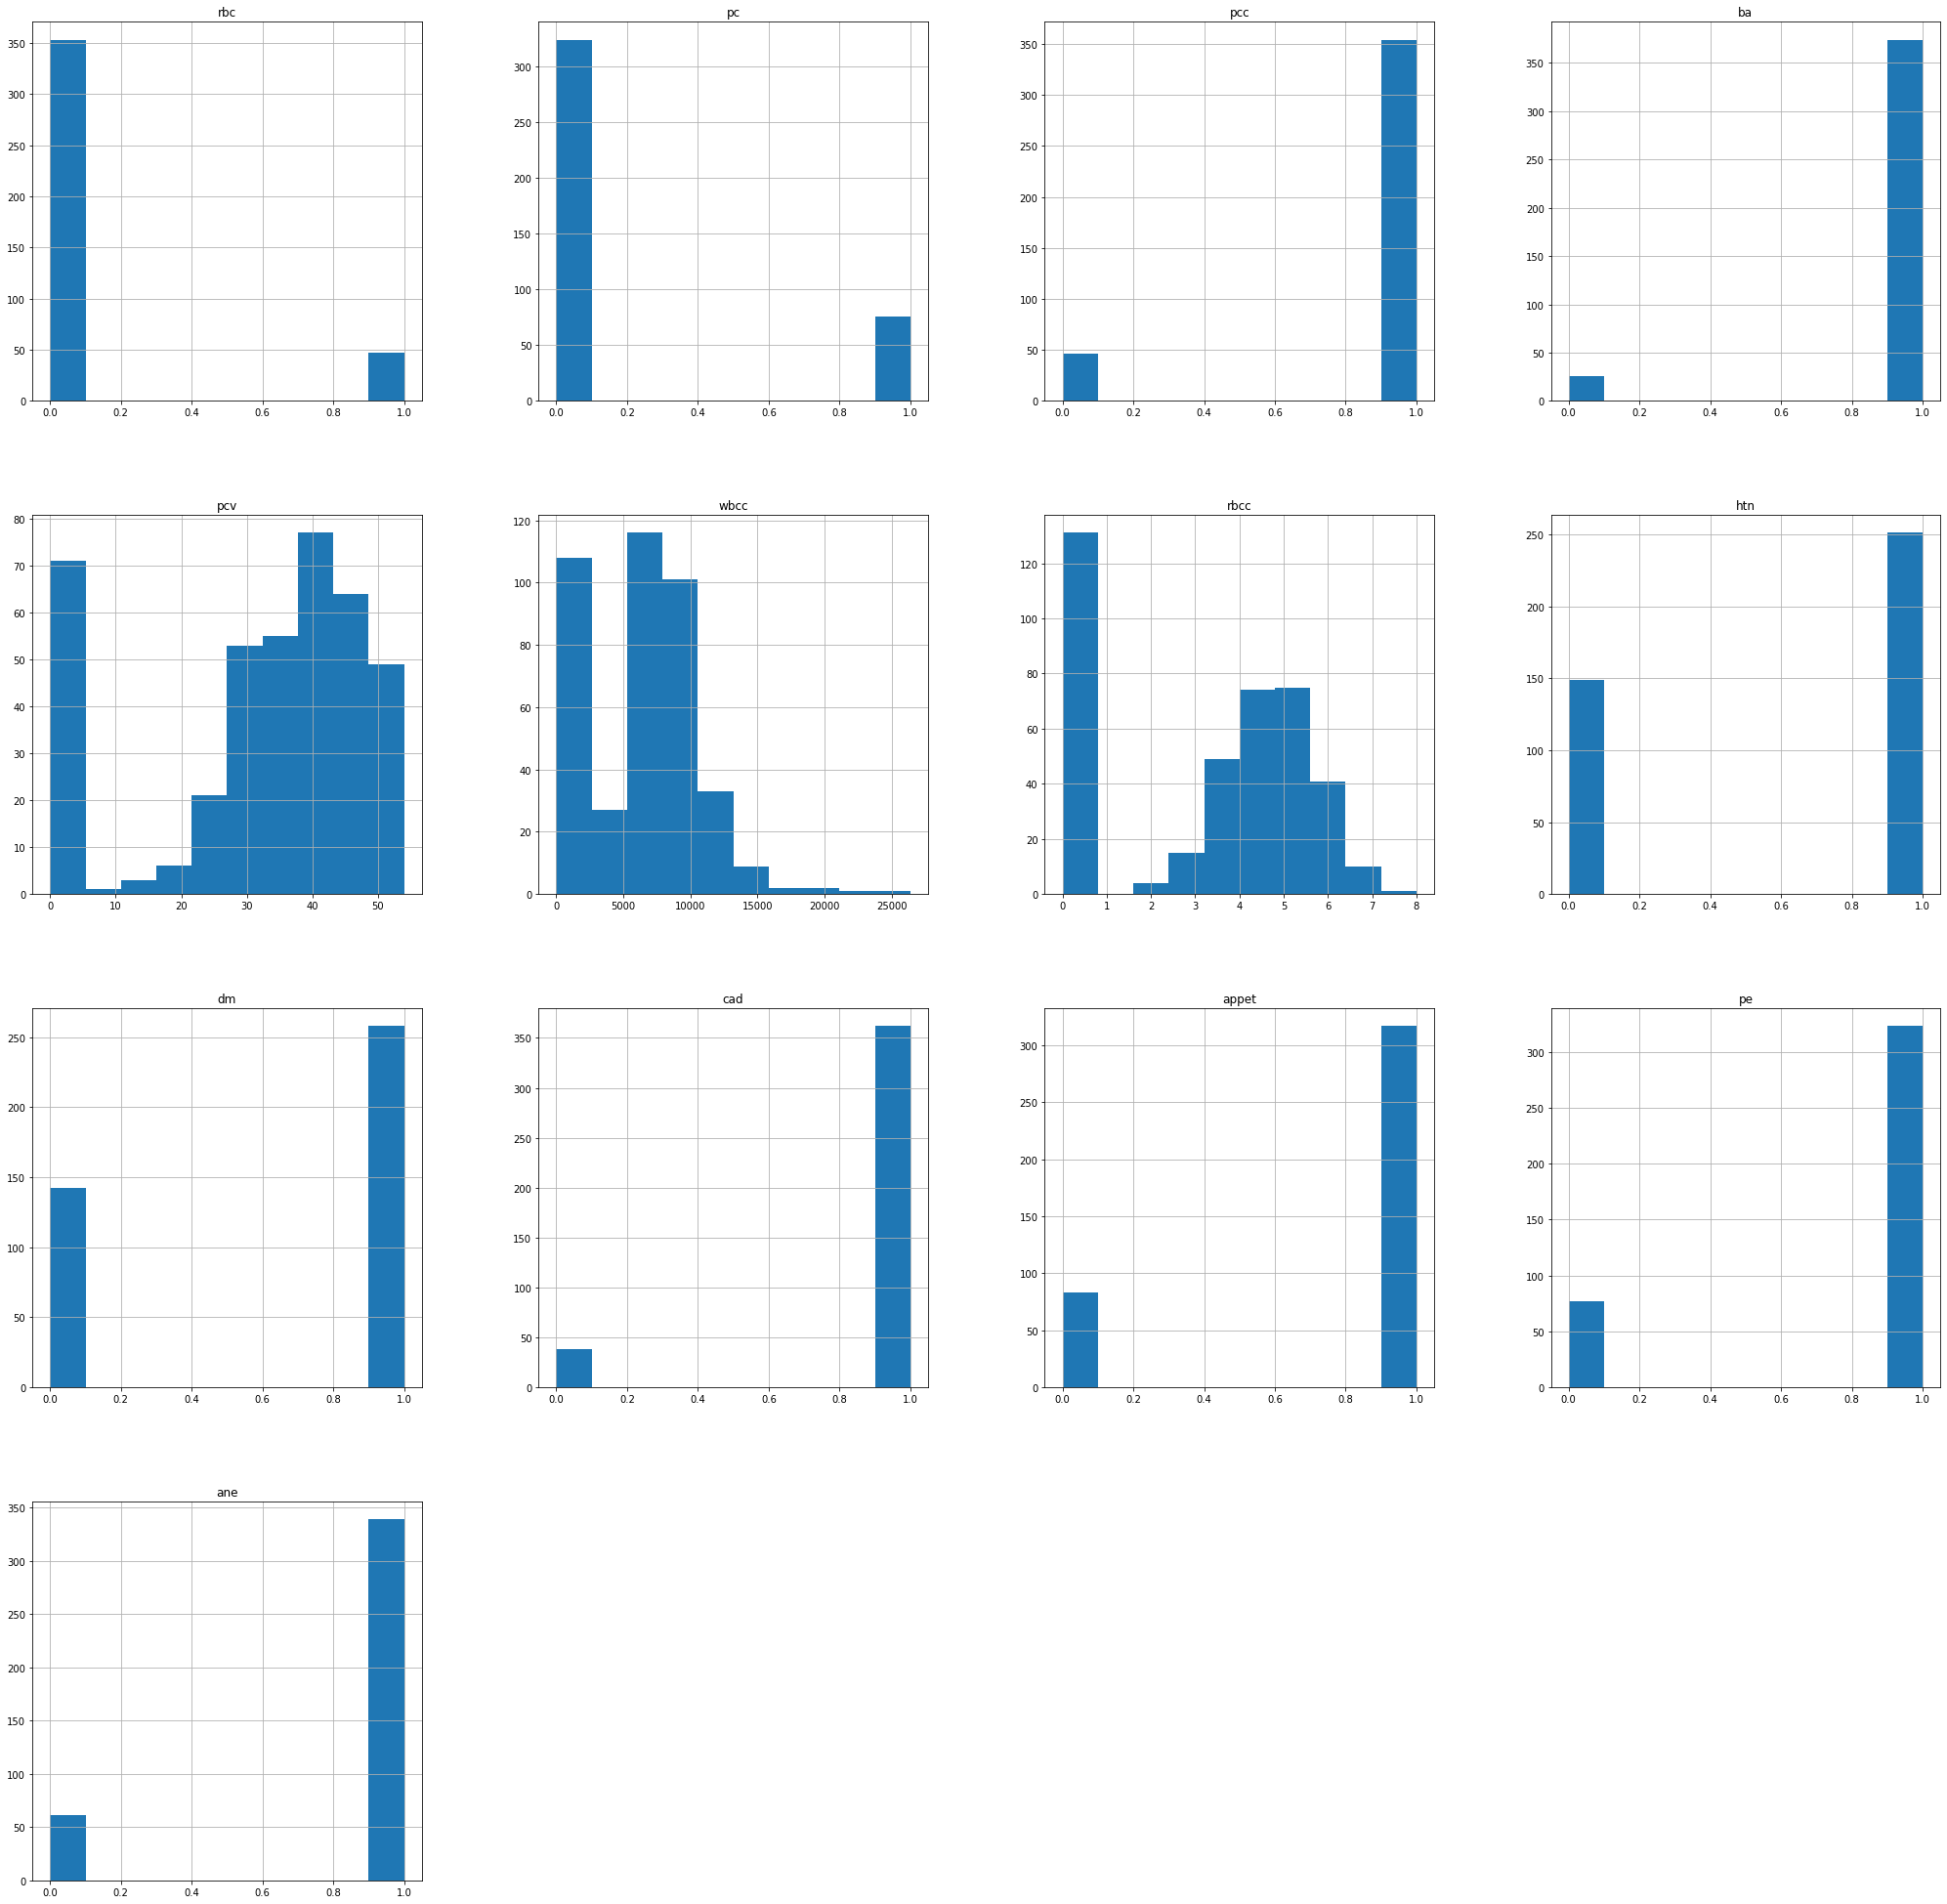

In [11]:
df.hist(figsize = (35,35))
plt.show()

## Data Preprocessing

In [7]:
try:
    #Description of Datasets
    #Print number of records and attributes of whole kidney dataset
    print('Shape of dataset: ' + str(df.shape))
    print('Total number of records in dataset = ' + str(df.shape[0]))
    print('Total number of attributes in dataset = ' + str(df.shape[1]))
    print('')
    
    
    df = df.replace('?', np.nan)
    
    #set the features and the target variables
    target_class = df['class']
    
    feature_classes = df.iloc[:, 0:24]
    
    
#     KNN imputation (n_neighbour = 5 means that the missing values will be replaced by the mean value of 5 nearest neighbors)
    knn_missing_values_imputer = KNNImputer(n_neighbors=5)
    feature_classes = pd.DataFrame(knn_missing_values_imputer.fit_transform(feature_classes),
                                   columns = feature_classes.columns)

    target_label_encoder = preprocessing.LabelEncoder()
    target_class = target_label_encoder.fit_transform(target_class)
    target_class1 = pd.DataFrame(target_class, columns=['class'])
    print(target_class1)

                                                      
except FileNotFoundError as e:
    logging.error(e)

Shape of dataset: (400, 25)
Total number of records in dataset = 400
Total number of attributes in dataset = 25

     class
0        0
1        0
2        0
3        0
4        0
..     ...
395      1
396      1
397      1
398      1
399      1

[400 rows x 1 columns]


## Feature Selection

## Method-1 Using Classifier

In [8]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
model = RandomForestClassifier()
model.fit(feature_classes,target_class)

RandomForestClassifier()

pcv     0.186474
hemo    0.182821
sg      0.136084
sc      0.103604
al      0.100622
dtype: float64


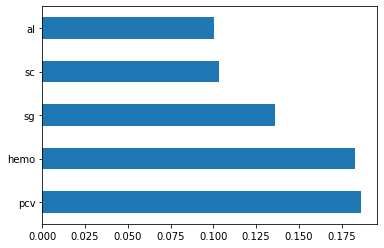

pcv     0.186474
hemo    0.182821
sg      0.136084
sc      0.103604
al      0.100622
rbcc    0.071742
dtype: float64


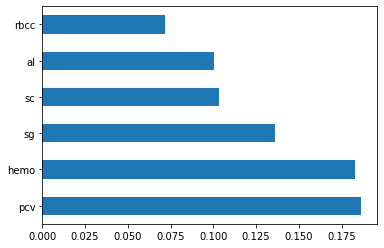

pcv     0.186474
hemo    0.182821
sg      0.136084
sc      0.103604
al      0.100622
rbcc    0.071742
bgr     0.047814
dtype: float64


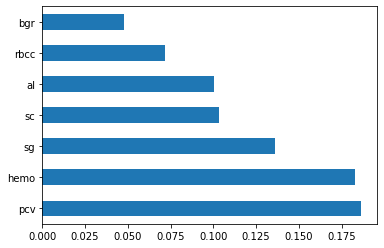

pcv     0.186474
hemo    0.182821
sg      0.136084
sc      0.103604
al      0.100622
rbcc    0.071742
bgr     0.047814
htn     0.040195
dtype: float64


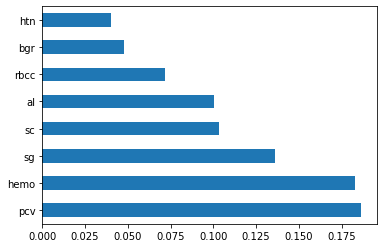

pcv     0.186474
hemo    0.182821
sg      0.136084
sc      0.103604
al      0.100622
rbcc    0.071742
bgr     0.047814
htn     0.040195
dm      0.022479
dtype: float64


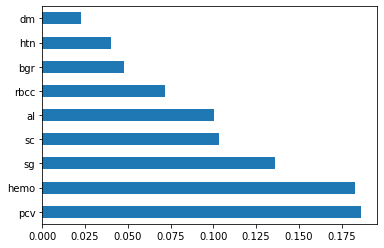

pcv     0.186474
hemo    0.182821
sg      0.136084
sc      0.103604
al      0.100622
rbcc    0.071742
bgr     0.047814
htn     0.040195
dm      0.022479
bu      0.020443
dtype: float64


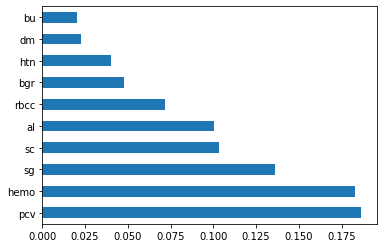

In [12]:
feat_importances = pd.Series(model.feature_importances_, index=feature_classes.columns)
for i in range(5,11):
    feat_importances.nlargest(i).plot(kind='barh')
    print(feat_importances.nlargest(i))
    plt.show()

## Method-2 Selectkbest

In [13]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(feature_classes,target_class)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(feature_classes.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [14]:
for i in range(5,11):
    print("\nTop "+str(i)+" Features\n")
    print(featureScores.nlargest(i,'Score'))
    


Top 5 Features

   Specs         Score
16  wbcc  52947.074533
9    bgr   2698.412174
10    bu   2482.290366
15   pcv   1291.222184
11    sc    371.855284

Top 6 Features

   Specs         Score
16  wbcc  52947.074533
9    bgr   2698.412174
10    bu   2482.290366
15   pcv   1291.222184
11    sc    371.855284
17  rbcc    291.906188

Top 7 Features

   Specs         Score
16  wbcc  52947.074533
9    bgr   2698.412174
10    bu   2482.290366
15   pcv   1291.222184
11    sc    371.855284
17  rbcc    291.906188
3     al    242.740298

Top 8 Features

   Specs         Score
16  wbcc  52947.074533
9    bgr   2698.412174
10    bu   2482.290366
15   pcv   1291.222184
11    sc    371.855284
17  rbcc    291.906188
3     al    242.740298
14  hemo    152.101934

Top 9 Features

   Specs         Score
16  wbcc  52947.074533
9    bgr   2698.412174
10    bu   2482.290366
15   pcv   1291.222184
11    sc    371.855284
17  rbcc    291.906188
3     al    242.740298
14  hemo    152.101934
0    age    110.65

## Splitting Dataset

In [15]:
train_features, test_features, train_target, test_target = train_test_split(feature_classes, target_class, 
                                                                                train_size = 0.7, test_size = 0.3, random_state = 42)
print('\nAfter Pre-processing:')
print('Size of train dataset: ' + str(train_target.shape[0]))
print('Size of test dataset: ' + str(test_target.shape[0]))


After Pre-processing:
Size of train dataset: 280
Size of test dataset: 120


In [16]:
train_features

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
157,62.0,70.0,1.025,3.0,0.0,0.0,1.0,1.0,1.0,122.0,...,12.6,39.0,7900.0,3.9,0.0,0.0,1.0,1.0,1.0,1.0
109,54.0,70.0,1.014,1.6,1.8,0.0,0.0,1.0,1.0,233.0,...,11.7,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
17,47.0,80.0,1.016,0.8,0.4,0.0,0.0,1.0,1.0,114.0,...,12.1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
347,43.0,60.0,1.025,0.0,0.0,0.0,0.0,1.0,1.0,108.0,...,17.8,43.0,7200.0,5.5,1.0,1.0,1.0,1.0,1.0,1.0
24,42.0,100.0,1.015,4.0,0.0,0.0,1.0,1.0,0.0,156.4,...,11.1,39.0,8300.0,4.6,0.0,1.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,46.0,60.0,1.010,1.0,0.0,0.0,0.0,1.0,1.0,163.0,...,9.8,28.0,14600.0,3.2,0.0,0.0,1.0,1.0,1.0,1.0
106,50.0,90.0,1.018,0.6,0.0,0.0,0.0,1.0,1.0,89.0,...,6.0,17.0,6500.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
270,23.0,80.0,1.025,0.0,0.0,0.0,0.0,1.0,1.0,111.0,...,14.3,41.0,7200.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0
348,38.0,80.0,1.020,0.0,0.0,0.0,0.0,1.0,1.0,99.0,...,13.6,44.0,7300.0,6.4,1.0,1.0,1.0,1.0,1.0,1.0


## Feature Scaling

In [18]:
try:
    #Scaling and normalization of features
    standard_feature_scaler = StandardScaler()
    train_features = standard_feature_scaler.fit_transform(train_features)
    train_features = pd.DataFrame(train_features, columns=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 
                                                             'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 
                                                             'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 
                                                             'cad', 'appet', 'pe', 'ane'])
    test_features  = standard_feature_scaler.transform(test_features)
    test_features = pd.DataFrame(test_features, columns=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 
                                                             'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 
                                                             'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 
                                                             'cad', 'appet', 'pe', 'ane'])
except FileNotFoundError as e:
    logging.error(e)

In [19]:
test_features

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,19.0,70.0,1.020,-1.586033e-18,-5.075305e-17,4.758099e-17,-6.344132e-18,1.000000e+00,1.0,191.4,...,11.50,7.612958e-17,6.900000e+03,-5.075305e-17,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,47.0,80.0,1.018,-1.586033e-18,-5.075305e-17,4.758099e-17,-6.344132e-18,1.000000e+00,1.0,93.0,...,13.30,5.200000e+01,8.100000e+03,5.200000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
2,60.0,100.0,1.020,2.000000e+00,-5.075305e-17,1.000000e+00,1.000000e+00,1.000000e+00,1.0,140.0,...,10.10,2.900000e+01,1.268826e-17,-5.075305e-17,-7.771561e-17,1.000000e+00,1.000000e+00,5.075305e-17,1.000000e+00,1.000000e+00
3,59.0,100.0,1.015,4.000000e+00,2.000000e+00,4.758099e-17,-6.344132e-18,1.000000e+00,1.0,255.0,...,7.30,2.000000e+01,9.800000e+03,3.900000e+00,-7.771561e-17,-3.806479e-17,6.344132e-17,1.000000e+00,1.000000e+00,-1.237106e-16
4,73.0,100.0,1.010,3.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.586033e-16,1.0,295.0,...,9.20,3.000000e+01,7.000000e+03,3.200000e+00,-7.771561e-17,-3.806479e-17,6.344132e-17,5.075305e-17,1.000000e+00,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,67.0,90.0,1.020,1.000000e+00,-5.075305e-17,4.758099e-17,1.000000e+00,1.586033e-16,1.0,141.0,...,10.24,7.612958e-17,1.268826e-17,-5.075305e-17,-7.771561e-17,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
116,56.0,80.0,1.010,1.000000e+00,-5.075305e-17,4.758099e-17,-6.344132e-18,1.000000e+00,1.0,165.0,...,13.50,4.000000e+01,1.180000e+04,5.000000e+00,-7.771561e-17,-3.806479e-17,1.000000e+00,5.075305e-17,-6.344132e-17,1.000000e+00
117,66.0,70.0,1.020,-1.586033e-18,-5.075305e-17,4.758099e-17,-6.344132e-18,1.000000e+00,1.0,94.0,...,16.00,4.100000e+01,5.300000e+03,5.900000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
118,41.0,80.0,1.020,-1.586033e-18,-5.075305e-17,4.758099e-17,-6.344132e-18,1.000000e+00,1.0,122.0,...,17.10,4.100000e+01,9.100000e+03,5.200000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [20]:
# featureScores.nlargest(5,'Score').iloc[:,0:1]
# featureScores.nlargest('Specs')

# for i in range(5,11):
#     f = featureScores.nlargest(i,'Score').iloc[:,0:1]
#     t = train_features[f["Specs"].tolist()]
#     print(t)
    
# for i in range(5,11):
#     print('The no of features are \n ' +str(i))
#     f = featureScores.nlargest(i,'Score').iloc[:,0:1]
#     tr = train_features[f["Specs"].tolist()]
#     ts = test_features[f["Specs"].tolist()]
#     print(tr)
#     print(ts)
    
# print(feat_importances.nlargest(i).index)
for i in range(5,11):
    print('The no of features are \n ' +str(i))
    f = feat_importances.nlargest(i).index
    print(f)
    tr = train_features[f.tolist()]
    ts = test_features[f.tolist()]
    print(tr)
    print(ts)


The no of features are 
 5
Index(['pcv', 'hemo', 'sg', 'sc', 'al'], dtype='object')
          pcv      hemo        sg        sc        al
0    0.408321  0.124601  1.404509 -0.226819  1.505800
1   -1.877104 -0.197842 -0.606597 -0.191919  0.435300
2   -1.877104 -0.054534 -0.240941  0.383931 -0.176414
3    0.642724  1.987608  1.404509 -0.348968 -0.788128
4    0.408321 -0.412804 -0.423769 -0.279169  2.270442
..        ...       ...       ...       ...       ...
275 -0.236286 -0.878556 -1.337908  0.052381 -0.023485
276 -0.880893 -2.239984  0.124715  0.540981 -0.329342
277  0.525522  0.733661  1.404509 -0.331518 -0.788128
278  0.701324  0.482872  0.490370 -0.436218 -0.788128
279  1.170129  0.590353 -1.337908 -0.157019 -0.788128

[280 rows x 5 columns]
              pcv   hemo     sg     sc            al
0    7.612958e-17  11.50  1.020   2.34 -1.586033e-18
1    5.200000e+01  13.30  1.018   0.90 -1.586033e-18
2    2.900000e+01  10.10  1.020   2.50  2.000000e+00
3    2.000000e+01   7.30  1.015 

## Machine Learning Models

In [21]:
#Support vector machine


#initialise the Support Vector Model
support_vector_machine_model = SVC(random_state = 0)

#defining the svc parameters for grid search
parameters_grid = {'kernel': ['poly', 'rbf', 'linear', 'sigmoid'], 
                   'C': [0.1, 1, 10, 100, 1000], 
                   'gamma': ['scale', 'auto'], 
                   'shrinking': [True, False]}


svm_grid_search = GridSearchCV(support_vector_machine_model, parameters_grid, scoring = 'accuracy')



print("\nFeatures From method 1\n")
for i in range(5,11):
    print('\nThe no of features are ' +str(i)+"\n")
    f = feat_importances.nlargest(i).index
    tr = train_features[f.tolist()]
    ts = test_features[f.tolist()]
    svm_grid_search.fit(tr, train_target)
    svm_prediction = svm_grid_search.predict(ts)
    print('\nPrecision: ' + str(metrics.precision_score(test_target, svm_prediction)))
    print('Accuracy: ' + str(metrics.accuracy_score(test_target, svm_prediction)))
    print('Recall: ' + str(metrics.recall_score(test_target, svm_prediction)))
    print('F1-score: ' + str(metrics.f1_score(test_target, svm_prediction)))


print("\nFeatures From method 2\n")
for i in range(5,11):
    print('\nThe no of features are ' +str(i)+"\n")

    f = featureScores.nlargest(i,'Score').iloc[:,0:1]
    tr = train_features[f["Specs"].tolist()]
    ts = test_features[f["Specs"].tolist()]
    
    
    svm_grid_search.fit(tr, train_target)


#     print('The best parameters are:\n ' +str(svm_grid_search.best_params_))


#     print('\nThe best model after gridsearch is:\n ' + str(svm_grid_search.best_estimator_))

    #svm predictions on test features
    svm_prediction = svm_grid_search.predict(ts)

    print('\nPrecision: ' + str(metrics.precision_score(test_target, svm_prediction)))
    print('Accuracy: ' + str(metrics.accuracy_score(test_target, svm_prediction)))
    print('Recall: ' + str(metrics.recall_score(test_target, svm_prediction)))
    print('F1-score: ' + str(metrics.f1_score(test_target, svm_prediction)))


#     print('\nClassification Report:\n' + str(metrics.classification_report(test_target, svm_prediction)))


#     print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(test_target, svm_prediction)))
#     sns.heatmap(metrics.confusion_matrix(test_target, svm_prediction), annot = True)
#     plt.show()

print("\nFeatures: All Features SVM\n")
svm_grid_search.fit(train_features, train_target)
svm_prediction = svm_grid_search.predict(test_features)
print('\nPrecision: ' + str(metrics.precision_score(test_target, svm_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(test_target, svm_prediction)))
print('Recall: ' + str(metrics.recall_score(test_target, svm_prediction)))
print('F1-score: ' + str(metrics.f1_score(test_target, svm_prediction)))


Features From method 1


The no of features are 5



c:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Precision: 0.0
Accuracy: 0.6333333333333333
Recall: 0.0
F1-score: 0.0

The no of features are 6


Precision: 0.0
Accuracy: 0.6
Recall: 0.0
F1-score: 0.0

The no of features are 7



c:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Precision: 0.0
Accuracy: 0.6333333333333333
Recall: 0.0
F1-score: 0.0

The no of features are 8


Precision: 0.9354838709677419
Accuracy: 0.8583333333333333
Recall: 0.6590909090909091
F1-score: 0.7733333333333332

The no of features are 9


Precision: 0.6285714285714286
Accuracy: 0.7833333333333333
Recall: 1.0
F1-score: 0.7719298245614035

The no of features are 10



c:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Precision: 0.0
Accuracy: 0.6333333333333333
Recall: 0.0
F1-score: 0.0

Features From method 2


The no of features are 5



c:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Precision: 0.0
Accuracy: 0.6333333333333333
Recall: 0.0
F1-score: 0.0

The no of features are 6


Precision: 0.0
Accuracy: 0.625
Recall: 0.0
F1-score: 0.0

The no of features are 7



c:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Precision: 0.0
Accuracy: 0.6333333333333333
Recall: 0.0
F1-score: 0.0

The no of features are 8



c:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Precision: 0.0
Accuracy: 0.6333333333333333
Recall: 0.0
F1-score: 0.0

The no of features are 9



c:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Precision: 0.0
Accuracy: 0.6333333333333333
Recall: 0.0
F1-score: 0.0

The no of features are 10



c:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Precision: 0.0
Accuracy: 0.6333333333333333
Recall: 0.0
F1-score: 0.0

Features: All Features SVM


Precision: 0.0
Accuracy: 0.6333333333333333
Recall: 0.0
F1-score: 0.0


c:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
#K-Nearest Neighbour

from sklearn.neighbors import KNeighborsClassifier

#initialise the k nearest neighbour Model
k_nearest_neighbour_model = KNeighborsClassifier()

#defining the knn parameters for grid search
knn_parameters_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                       'weights': ['uniform', 'distance'], 
                       'algorithm':['auto', 'ball_tree','kd_tree','brute'], 
                       'n_jobs':[1, -1]}


knn_grid_search = GridSearchCV(k_nearest_neighbour_model, knn_parameters_grid, scoring = 'accuracy')




print("\nFeatures From method 1\n")
for i in range(5,11):
    print('\nThe no of features are ' +str(i)+"\n")
    f = feat_importances.nlargest(i).index
    tr = train_features[f.tolist()]
    ts = test_features[f.tolist()]
    knn_grid_search.fit(tr, train_target)
    knn_prediction = knn_grid_search.predict(ts)
    print('\nPrecision: ' + str(metrics.precision_score(test_target, knn_prediction)))
    print('Accuracy: ' + str(metrics.accuracy_score(test_target, knn_prediction)))
    print('Recall: ' + str(metrics.recall_score(test_target, knn_prediction)))
    print('F1-score: ' + str(metrics.f1_score(test_target, knn_prediction)))
    
    
print("\nFeatures From method 2\n")
for i in range(5,11):
    print('\nThe no of features are ' +str(i)+"\n")

    f = featureScores.nlargest(i,'Score').iloc[:,0:1]
    tr = train_features[f["Specs"].tolist()]
    ts = test_features[f["Specs"].tolist()]
    

    knn_grid_search.fit(tr, train_target)


#     print('The best parameters are:\n ' +str(knn_grid_search.best_params_))


#     print('\nThe best model after gridsearch is:\n ' + str(knn_grid_search.best_estimator_))

    #KNN predictions on test features
    knn_prediction = knn_grid_search.predict(ts)

    #Performance Measure
    print('\nPrecision: ' + str(metrics.precision_score(test_target, knn_prediction)))
    print('Accuracy: ' + str(metrics.accuracy_score(test_target, knn_prediction)))
    print('Recall: ' + str(metrics.recall_score(test_target, knn_prediction)))
    print('F1-score: ' + str(metrics.f1_score(test_target, knn_prediction)))


#     print('\nClassification Report:\n' + str(metrics.classification_report(test_target, knn_prediction)))


#     print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(test_target, knn_prediction)))
#     sns.heatmap(metrics.confusion_matrix(test_target, knn_prediction), annot = True)
#     plt.show()
print("\nFeatures: All Features KNN\n")
knn_grid_search.fit(train_features, train_target)
knn_prediction = knn_grid_search.predict(test_features)
print('\nPrecision: ' + str(metrics.precision_score(test_target, knn_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(test_target, knn_prediction)))
print('Recall: ' + str(metrics.recall_score(test_target, knn_prediction)))
print('F1-score: ' + str(metrics.f1_score(test_target, knn_prediction)))


Features From method 1


The no of features are 5


Precision: 0.4731182795698925
Accuracy: 0.5916666666666667
Recall: 1.0
F1-score: 0.6423357664233577

The no of features are 6


Precision: 0.4731182795698925
Accuracy: 0.5916666666666667
Recall: 1.0
F1-score: 0.6423357664233577

The no of features are 7



c:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Precision: 0.0
Accuracy: 0.6333333333333333
Recall: 0.0
F1-score: 0.0

The no of features are 8



c:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Precision: 0.0
Accuracy: 0.6333333333333333
Recall: 0.0
F1-score: 0.0

The no of features are 9



c:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Precision: 0.0
Accuracy: 0.6333333333333333
Recall: 0.0
F1-score: 0.0

The no of features are 10



c:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Precision: 0.0
Accuracy: 0.6333333333333333
Recall: 0.0
F1-score: 0.0

Features From method 2


The no of features are 5



c:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Precision: 0.0
Accuracy: 0.6333333333333333
Recall: 0.0
F1-score: 0.0

The no of features are 6



c:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Precision: 0.0
Accuracy: 0.6333333333333333
Recall: 0.0
F1-score: 0.0

The no of features are 7



c:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Precision: 0.0
Accuracy: 0.6333333333333333
Recall: 0.0
F1-score: 0.0

The no of features are 8



c:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Precision: 0.0
Accuracy: 0.6333333333333333
Recall: 0.0
F1-score: 0.0

The no of features are 9



c:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Precision: 0.0
Accuracy: 0.6333333333333333
Recall: 0.0
F1-score: 0.0

The no of features are 10



c:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Precision: 0.0
Accuracy: 0.6333333333333333
Recall: 0.0
F1-score: 0.0

Features: All Features KNN


Precision: 0.0
Accuracy: 0.6333333333333333
Recall: 0.0
F1-score: 0.0


c:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
#Decision tree

from sklearn.tree import DecisionTreeClassifier

#initialise the decision tree Model
decision_tree_model = DecisionTreeClassifier(random_state = 0)

#defining the decision tree parameters for grid search
dt_parameters_grid = {'criterion': ['gini', 'entropy'], 
                      'splitter': ['best', 'random'], 
                      'min_samples_leaf': [1, 2, 3, 4, 5], 
                      'max_features': ['auto', 'sqrt', 'log2']}


dt_grid_search = GridSearchCV(decision_tree_model, dt_parameters_grid, scoring = 'accuracy')





print("\nFeatures From method 1\n")
for i in range(5,11):
    print('\nThe no of features are ' +str(i)+"\n")
    f = feat_importances.nlargest(i).index
    tr = train_features[f.tolist()]
    ts = test_features[f.tolist()]
    dt_grid_search.fit(tr, train_target)
    dt_prediction = dt_grid_search.predict(ts)
    print('\nPrecision: ' + str(metrics.precision_score(test_target, dt_prediction)))
    print('Accuracy: ' + str(metrics.accuracy_score(test_target, dt_prediction)))
    print('Recall: ' + str(metrics.recall_score(test_target, dt_prediction)))
    print('F1-score: ' + str(metrics.f1_score(test_target, dt_prediction)))


print("\nFeatures From method 2\n")
for i in range(5,11):
    print('\nThe no of features are ' +str(i)+"\n")

    f = featureScores.nlargest(i,'Score').iloc[:,0:1]
    tr = train_features[f["Specs"].tolist()]
    ts = test_features[f["Specs"].tolist()]
    
    dt_grid_search.fit(tr, train_target)


#     print('The best parameters are:\n ' +str(dt_grid_search.best_params_))


#     print('\nThe best model after gridsearch is:\n ' + str(dt_grid_search.best_estimator_))

    #Decision Tree predictions on test features
    dt_prediction = dt_grid_search.predict(ts)
    print('\nPrecision: ' + str(metrics.precision_score(test_target, dt_prediction)))
    print('Accuracy: ' + str(metrics.accuracy_score(test_target, dt_prediction)))
    print('Recall: ' + str(metrics.recall_score(test_target, dt_prediction)))
    print('F1-score: ' + str(metrics.f1_score(test_target, dt_prediction)))


#     print('\nClassification Report:\n' + str(metrics.classification_report(test_target, dt_prediction)))


#     print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(test_target, dt_prediction)))
#     sns.heatmap(metrics.confusion_matrix(test_target, dt_prediction), annot = True)
#     plt.show()
print("\nFeatures: All Features DT\n")
dt_grid_search.fit(train_features, train_target)
dt_prediction = dt_grid_search.predict(test_features)
print('\nPrecision: ' + str(metrics.precision_score(test_target, dt_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(test_target, dt_prediction)))
print('Recall: ' + str(metrics.recall_score(test_target, dt_prediction)))
print('F1-score: ' + str(metrics.f1_score(test_target, dt_prediction)))



Features From method 1


The no of features are 5



c:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Precision: 0.0
Accuracy: 0.6333333333333333
Recall: 0.0
F1-score: 0.0

The no of features are 6


Precision: 0.7457627118644068
Accuracy: 0.875
Recall: 1.0
F1-score: 0.8543689320388349

The no of features are 7



c:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Precision: 0.0
Accuracy: 0.6333333333333333
Recall: 0.0
F1-score: 0.0

The no of features are 8


Precision: 0.36666666666666664
Accuracy: 0.36666666666666664
Recall: 1.0
F1-score: 0.5365853658536585

The no of features are 9


Precision: 0.36666666666666664
Accuracy: 0.36666666666666664
Recall: 1.0
F1-score: 0.5365853658536585

The no of features are 10


Precision: 0.36666666666666664
Accuracy: 0.36666666666666664
Recall: 1.0
F1-score: 0.5365853658536585

Features From method 2


The no of features are 5



c:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Precision: 0.0
Accuracy: 0.6333333333333333
Recall: 0.0
F1-score: 0.0

The no of features are 6



c:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Precision: 0.0
Accuracy: 0.6333333333333333
Recall: 0.0
F1-score: 0.0

The no of features are 7



c:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Precision: 0.0
Accuracy: 0.6333333333333333
Recall: 0.0
F1-score: 0.0

The no of features are 8



c:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Precision: 0.0
Accuracy: 0.6333333333333333
Recall: 0.0
F1-score: 0.0

The no of features are 9


Precision: 0.36666666666666664
Accuracy: 0.36666666666666664
Recall: 1.0
F1-score: 0.5365853658536585

The no of features are 10



c:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Precision: 0.0
Accuracy: 0.6333333333333333
Recall: 0.0
F1-score: 0.0

Features: All Features DT


Precision: 0.0
Accuracy: 0.6333333333333333
Recall: 0.0
F1-score: 0.0


c:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


| Classification Algorithm | Accuracy (%) | Recall (%)| Precision (%) | F1-score (%)|
|---|---|---|---|---|
|Support Vector Machine|99.16|97.72|100|98.85|
|K Nearest Neighbour   |95|93.18|93.18|93.18|
|Decision Tree         |97.5|97.72|95.55|96.62|

## Deep Learning Models

In [24]:
import keras
from keras import models, layers, optimizers
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix
from keras.layers import Input
from keras.models import Sequential, Model
import tensorflow as tf
import random as rn

In [25]:
batch_size = 256
n_epochs = 10
n_nodes = 16
nb_classes = 2
weight = 0.2
class_weight = {0: weight, 1: (1-weight)}
dropout = 0.1
lr = 0.01
n_basic_features = 24
n_features = n_basic_features
n_cnn_features = n_features
n_filters = 16
kernel_size_3 = 3

In [29]:
X_train = train_features
X_test = test_features
y_train = train_target
y_test = test_target

In [30]:
n_cnn_features = 24
X_train_cnn = X_train
X_test_cnn = X_test
print(X_train.shape,X_test.shape)

(280, 24) (120, 24)


In [31]:
X_train_cnn = X_train_cnn.reshape((X_train.shape[0],n_cnn_features,1))
X_test_cnn  = X_test_cnn.reshape((X_test.shape[0],n_cnn_features,1))

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [32]:
nb_classes = 2
Y_train_cat = np_utils.to_categorical(y_train, nb_classes)
Y_test_cat = np_utils.to_categorical(y_test, nb_classes)
print(Y_train_cat.shape,Y_test_cat.shape)

(280, 2) (120, 2)


In [33]:
inp_cnn   = Input(shape=(n_cnn_features,1))

In [34]:
adam = tf.keras.optimizers.Adam(lr=lr)
activation = 'relu'

#Two convolution layers
d_1 = layers.Conv1D(n_filters, kernel_size_3, input_shape=(n_cnn_features,1), padding='same', activation='relu', name='layer_1')(inp_cnn)
d_2 = layers.Dropout(dropout)(d_1)
d_3 = layers.Conv1D(n_filters, kernel_size_3, padding='same', activation='relu', name='layer_2')(d_2)
d_4 = layers.Dropout(dropout)(d_3)

#Flattening operation
d_5 = layers.Flatten()(d_4)

#Fully connected layer 1
d_6 = layers.Dense(n_nodes, name='layer_3')(d_5)
d_7 = layers.BatchNormalization()(d_6)
d_8 = layers.Dropout(dropout)(d_7)
d_9 = layers.Activation(activation='relu')(d_8)

#Output layer(softmax function)
d_10 = layers.Dense(2, activation='softmax')(d_9)

#Model definition:
model_cnn_3 = Model(inp_cnn, d_10)
model_cnn_3.summary()
model_cnn_3.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"])

c:\python\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 24, 1)]           0         
_________________________________________________________________
layer_1 (Conv1D)             (None, 24, 16)            64        
_________________________________________________________________
dropout (Dropout)            (None, 24, 16)            0         
_________________________________________________________________
layer_2 (Conv1D)             (None, 24, 16)            784       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 16)            0         
_________________________________________________________________
flatten (Flatten)            (None, 384)               0         
_________________________________________________________________
layer_3 (Dense)              (None, 16)                6160  

In [35]:
history = model_cnn_3.fit(X_train_cnn, Y_train_cat, batch_size=batch_size,
                          epochs=n_epochs, class_weight=class_weight,
                          validation_data=(X_test_cnn, Y_test_cat)) 

Epoch 1/10
2/2 [==============================] - 1s 184ms/step - loss: 0.3227 - accuracy: 0.4464 - val_loss: 120.8493 - val_accuracy: 0.6333
Epoch 2/10
2/2 [==============================] - 0s 22ms/step - loss: 0.0732 - accuracy: 0.8393 - val_loss: 99.4250 - val_accuracy: 0.6333
Epoch 3/10
2/2 [==============================] - 0s 27ms/step - loss: 0.0576 - accuracy: 0.9000 - val_loss: 5.9162 - val_accuracy: 0.6583
Epoch 4/10
2/2 [==============================] - 0s 25ms/step - loss: 0.0483 - accuracy: 0.9143 - val_loss: 246.5132 - val_accuracy: 0.5833
Epoch 5/10
2/2 [==============================] - 0s 25ms/step - loss: 0.0448 - accuracy: 0.9464 - val_loss: 523.2341 - val_accuracy: 0.5833
Epoch 6/10
2/2 [==============================] - 0s 27ms/step - loss: 0.0399 - accuracy: 0.9429 - val_loss: 700.0465 - val_accuracy: 0.5833
Epoch 7/10
2/2 [==============================] - 0s 25ms/step - loss: 0.0369 - accuracy: 0.9643 - val_loss: 744.7645 - val_accuracy: 0.5833
Epoch 8/10
2/2 

4/4 [==============================] - 0s 1ms/step

Precision: 0.0
Accuracy: 0.6333333333333333
Recall: 0.0
F1-score: 0.0

Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.78        76
           1       0.00      0.00      0.00        44

    accuracy                           0.63       120
   macro avg       0.32      0.50      0.39       120
weighted avg       0.40      0.63      0.49       120


Confusion Matrix: 
[[76  0]
 [44  0]]


c:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are il

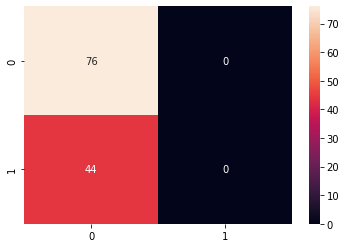

In [38]:
pred = model_cnn_3.predict([X_test_cnn], verbose=1)
Y_pred = np.reshape(np.argmax(pred, axis=1), newshape=(pred.shape[0],1)) 
Y_test_ = np.asarray(np.reshape(y_test, newshape=(y_test.shape[0],1)), dtype=np.int)

print('\nPrecision: ' + str(metrics.precision_score(y_test, Y_pred)))
print('Accuracy: ' + str(metrics.accuracy_score(y_test, Y_pred)))
print('Recall: ' + str(metrics.recall_score(y_test, Y_pred)))
print('F1-score: ' + str(metrics.f1_score(y_test, Y_pred)))


print('\nClassification Report:\n' + str(metrics.classification_report(y_test, Y_pred)))


print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(y_test, Y_pred)))
sns.heatmap(metrics.confusion_matrix(y_test, Y_pred), annot = True)
plt.show()

## Pickel File

In [ ]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(svm_grid_search, 'ckd.pkl')
 
# Load the model from the file
svm_from_joblib = joblib.load('ckd.pkl')
 
# Use the loaded model to make predictions


In [ ]:
y_pred = svm_from_joblib.predict(test_features)
test_features

In [ ]:
test_target[0]

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
mean_squared_error(test_target, y_pred)
mean_absolute_percentage_error(test_target, y_pred)

In [ ]:
df.iloc[209]